In [1]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential

model_final = keras.models.load_model("Model_Kaggle")

In [3]:
model_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

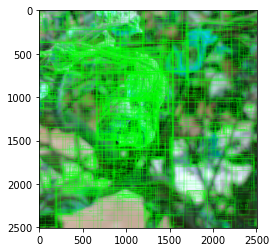

In [7]:
im = cv2.imread(os.path.join("D:/ST/trainData/Tomato_Object/","0010998_20181011_154429.png"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.imshow(imOut)

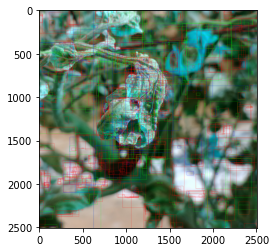

In [11]:
with tf.device("/device:CPU:0"):
    category = {0:{'name':'Bacterial_spot','color':(0,0,255)},1:{'name':'Early_blight','color':(0,0,255)} \
                ,2:{'name':'healthy','color':(0,255,0)},3:{'name':'Late_blight','color':(0,0,255)} \
                ,4:{'name':'Leaf_Mold','color':(255,0,0)},5:{'name':'Septoria_leaf_spot','color':(0,0,255)},6:{'name':'Spider_mites Two-spotted_spider_mite','color':(255,255,255)} \
                ,7:{'name':'Target_Spot','color':(0,0,255)},8:{'name':'mosaic_virus','color':(255,0,0)},9:{'name':'Leaf_Curl_Virus','color':(255,0,0)}}
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    z=0
    for e,i in enumerate(os.listdir('D:/ST/trainData/Tomato_Object/')):
        z += 1
        img = cv2.imread(os.path.join('D:/ST/trainData/Tomato_Object/',i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        for e,result in enumerate(ssresults):
            if e < 2000:
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                out= model_final.predict(img)
                for ix,ot in enumerate(out[0]):
                    rgpColor = category[ix]['color']
                    if ot > 0.9:
                        cv2.rectangle(imout, (x, y), (x+w, y+h), rgpColor, 1, cv2.LINE_AA)
        plt.figure()
        plt.imshow(imout)